<a href="https://colab.research.google.com/github/Nayanpatel009/Assignment/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
from sklearn.datasets import load_breast_cancer

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
df = load_breast_cancer()

In [113]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [114]:
df.target[::100]

array([0, 0, 1, 0, 0, 1])

In [115]:
df.data.shape

(569, 30)

In [116]:
df.target.shape

(569,)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
df.data, df.target, random_state=11)

In [119]:
X_train.shape

(426, 30)

In [120]:
X_test.shape

(143, 30)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier()

In [123]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [124]:
predicted = knn.predict(X=X_test)

In [125]:
expected = y_test

In [126]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [127]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [128]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [129]:
wrong

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

In [130]:
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

94.41%


In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [133]:
confusion

array([[43,  7],
       [ 1, 92]])

In [134]:
from sklearn.metrics import classification_report

In [135]:
names = [str(digit) for digit in df.target_names]

In [136]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



In [137]:
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

In [138]:
import seaborn as sns

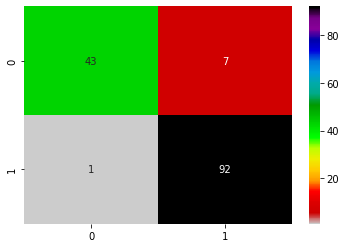

In [139]:
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [140]:
from sklearn.model_selection import KFold

In [141]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
scores = cross_val_score(estimator=knn, X=df.data, y=df.target, cv=kfold)

In [144]:
scores

array([0.92982456, 0.94736842, 0.89473684, 0.92982456, 0.92982456,
       0.94736842, 0.89473684, 0.94736842, 0.94736842, 0.91071429])

In [145]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 92.79%


In [146]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 2.01%


In [147]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB

In [148]:
estimators = {'KNeighborsClassifier': knn, 'SVC': SVC(gamma='scale'), 'GaussianNB': GaussianNB()}

In [149]:
estimators = {'GaussianNB': GaussianNB(), 'KNeighborsClassifier': KNeighborsClassifier(), 'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000), 'SVC': SVC(gamma='scale')}

In [150]:
for estimator_name, estimator_object in estimators.items(): kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=estimator_object,
X=df.data, y=df.target, cv=kfold)
print(f'{estimator_name:>20}: ' +
f'mean accuracy={scores.mean():.2%}; ' +
f'standard deviation={scores.std():.2%}')

                 SVC: mean accuracy=91.92%; standard deviation=3.52%


In [151]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [152]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)